In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style('darkgrid')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
df1 = pd.read_csv('df_with_all_columns.csv', index_col=0)

In [4]:
df = df1[['saleprice', 'saleinstrument', 'sqfttotliving', 'yrbuilt', 'yrrenovated', 'bedrooms',
       'zipcode', 'bldggrade', 'bldggradevar', 'sqfttotbasement', 'sqftfinbasement', 'sqftopenporch',
       'sqftenclosedporch', 'sqftdeck', 'heatsystem', 'heatsource',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount', 'condition',
       'viewutilization', 'sqftgarageattached', 'daylightbasement',
       'finbasementgrade', 'hbuasifvacant', 'inadequateparking', 'mtrainier',
       'olympics', 'cascades', 'territorial', 'seattleskyline', 'pugetsound',
       'lakewashington', 'lakesammamish', 'smalllakerivercreek', 'otherview',
       'wfntlocation', 'wfntfootage', 'trafficnoise', 'airportnoise', 'powerlines',
       'othernuisances', 'adjacentgreenbelt']].copy()

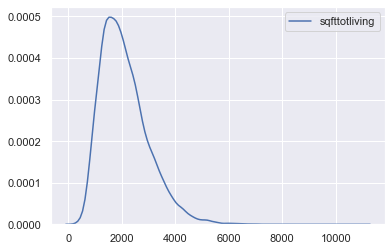

In [36]:
sns.kdeplot(df['sqfttotliving']);

In [5]:
df['porch'] = df['sqftopenporch'] + df['sqftenclosedporch']
df['baths'] = df['bathfullcount'] + (0.75*df['bath3qtrcount']) + (0.5*df['bathhalfcount'])
df.drop(columns=['sqftopenporch', 'sqftenclosedporch', 'bathfullcount', 'bath3qtrcount',
                 'bathhalfcount'], inplace=True)
df['pricepersqft'] = df['saleprice']/df['sqfttotliving']
df['pricepersqft_finbasement'] = df['saleprice']/ (df['sqfttotliving'] + df['sqftfinbasement'])

In [6]:
df

,saleprice,saleinstrument,sqfttotliving,yrbuilt,yrrenovated,bedrooms,zipcode,bldggrade,bldggradevar,sqfttotbasement,...,wfntfootage,trafficnoise,airportnoise,powerlines,othernuisances,adjacentgreenbelt,porch,baths,pricepersqft,pricepersqft_finbasement
0,1910000,3,3990,1952,2019,6,98125,8,0,1360,...,0,0,0,N,N,N,110,4.50,478.696742,357.009346
1,1089950,3,3920,2018,0,5,98028.0,8,0,930,...,0,0,0,N,N,N,550,3.25,278.048469,224.731959
2,412500,3,2280,1958,0,4,98056,7,0,1140,...,0,1,0,N,N,N,0,1.75,180.921053,120.614035
3,541000,3,1030,1965,0,3,98052,7,0,0,...,0,0,0,N,N,N,210,1.50,525.242718,525.242718
4,1020000,3,2410,1939,0,3,98144,8,0,1070,...,0,1,0,N,N,N,0,1.75,423.236515,293.103448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,1201000,3,3680,1974,0,5,98072,9,0,0,...,0,0,0,N,N,N,50,3.00,326.358696,326.358696
18289,921000,3,2280,2016,0,3,NaN,8,0,0,...,0,0,0,N,N,N,110,2.50,403.947368,403.947368
18290,627000,3,3820,1967,0,5,98058,8,0,0,...,0,0,0,N,N,N,80,2.25,164.136126,164.136126
18291,640000,3,2450,2015,0,4,98146,8,0,0,...,0,2,0,N,N,N,50,2.50,261.224490,261.224490


In [7]:
df['zipcode'] = df['zipcode'].astype(str)
df['zipcode'] = df['zipcode'].apply(lambda x: x[:5])

looking into saleinstrument being only statutory warranty deed...

In [8]:
df = df[df['saleinstrument'] == 3]

In [9]:
mean, std = df['saleprice'].agg(['mean', 'std'])
print("mean = {} and std = {}".format(mean, std))
def z_score(row):
    return (row - mean) / std

df['z_score'] = df.saleprice.apply(z_score)
df = df[abs(df['z_score']) < 3]
df

mean = 797275.1958184319 and std = 584686.7549102028


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,saleprice,saleinstrument,sqfttotliving,yrbuilt,yrrenovated,bedrooms,zipcode,bldggrade,bldggradevar,sqfttotbasement,...,trafficnoise,airportnoise,powerlines,othernuisances,adjacentgreenbelt,porch,baths,pricepersqft,pricepersqft_finbasement,z_score
0,1910000,3,3990,1952,2019,6,98125,8,0,1360,...,0,0,N,N,N,110,4.50,478.696742,357.009346,1.903113
1,1089950,3,3920,2018,0,5,98028,8,0,930,...,0,0,N,N,N,550,3.25,278.048469,224.731959,0.500567
2,412500,3,2280,1958,0,4,98056,7,0,1140,...,1,0,N,N,N,0,1.75,180.921053,120.614035,-0.658088
3,541000,3,1030,1965,0,3,98052,7,0,0,...,0,0,N,N,N,210,1.50,525.242718,525.242718,-0.438312
4,1020000,3,2410,1939,0,3,98144,8,0,1070,...,1,0,N,N,N,0,1.75,423.236515,293.103448,0.380930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,1201000,3,3680,1974,0,5,98072,9,0,0,...,0,0,N,N,N,50,3.00,326.358696,326.358696,0.690498
18289,921000,3,2280,2016,0,3,nan,8,0,0,...,0,0,N,N,N,110,2.50,403.947368,403.947368,0.211609
18290,627000,3,3820,1967,0,5,98058,8,0,0,...,0,0,N,N,N,80,2.25,164.136126,164.136126,-0.291225
18291,640000,3,2450,2015,0,4,98146,8,0,0,...,2,0,N,N,N,50,2.50,261.224490,261.224490,-0.268991


In [10]:
df.saleprice.describe()

count    1.787400e+04
mean     7.478964e+05
std      3.897810e+05
min      1.000000e+01
25%      4.700000e+05
50%      6.500000e+05
75%      8.900000e+05
max      2.550000e+06
Name: saleprice, dtype: float64

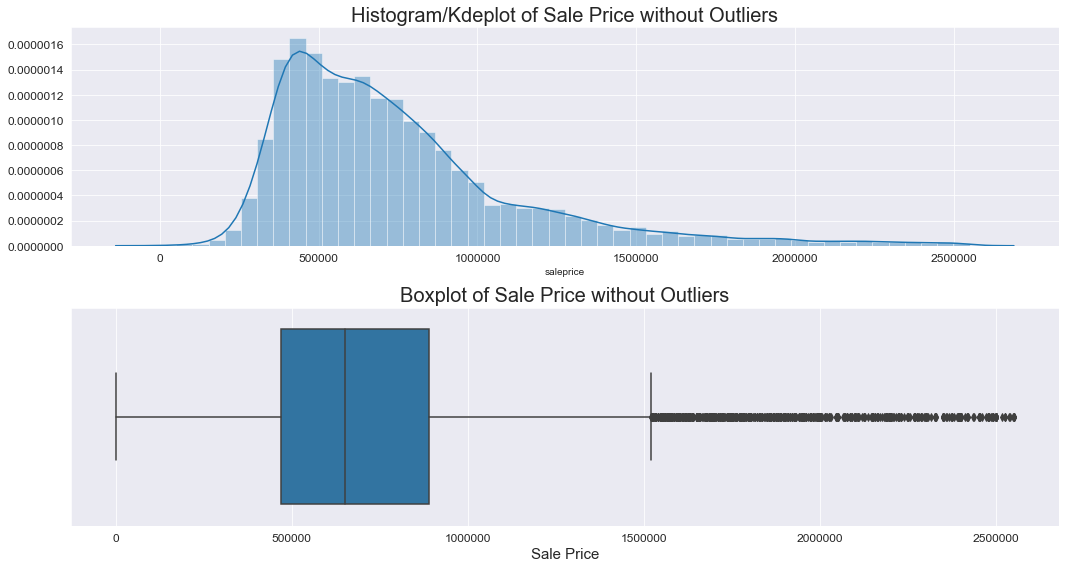

In [11]:
fig, ax = plt.subplots(2,1, figsize=(15, 8))
sns.distplot(df.saleprice, ax = ax[0])
sns.boxplot(df.saleprice, ax= ax[1])
ax[0].set_title('Histogram/Kdeplot of Sale Price without Outliers', fontsize=20)
ax[1].set_title('Boxplot of Sale Price without Outliers', fontsize=20)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)
plt.xlabel('Sale Price', fontsize = 15)
plt.tight_layout();

In [12]:
df_porch = df[df['porch'] > 0]

In [13]:
df_noporch = df[df['porch'] == 0]

In [14]:
print('Properties with a porch = ', len(df_porch))
print('Properties without a porch = ', len(df_noporch))
len(df_porch) + len(df_noporch) == len(df)

Properties with a porch =  9357
Properties without a porch =  8517


True

In [15]:
df_porch.describe()

,saleprice,saleinstrument,sqfttotliving,yrbuilt,yrrenovated,bedrooms,bldggrade,bldggradevar,sqfttotbasement,sqftfinbasement,...,otherview,wfntlocation,wfntfootage,trafficnoise,airportnoise,porch,baths,pricepersqft,pricepersqft_finbasement,z_score
count,9.357000e+03,9357.0,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.0,9357.000000,9357.000000,...,9357.000000,9357.000000,9357.000000,9357.000000,9357.0,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,8.297351e+05,3.0,2364.746607,1978.615582,102.621139,3.563749,7.928610,0.0,415.122475,259.332158,...,0.017313,0.080688,1.035161,0.178262,0.0,143.269638,2.374506,366.401448,338.310320,0.055517
std,4.315467e+05,0.0,961.204124,33.815241,441.355835,0.917575,1.180589,0.0,572.962507,446.055720,...,0.207593,0.775182,13.137154,0.514087,0.0,177.885104,0.790025,156.226541,151.153251,0.738082
min,8.000000e+04,3.0,340.000000,1900.000000,0.000000,0.000000,3.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000,52.631579,36.089239,-1.226768
25%,5.150000e+05,3.0,1650.000000,1956.000000,0.000000,3.000000,7.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,60.000000,1.750000,252.380952,234.759358,-0.482780
50%,7.200000e+05,3.0,2260.000000,1988.000000,0.000000,4.000000,8.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,2.500000,338.983051,310.880829,-0.132165
75%,1.008500e+06,3.0,2940.000000,2006.000000,0.000000,4.000000,9.000000,0.0,860.000000,450.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,180.000000,2.750000,443.127962,404.466501,0.361261
max,2.550000e+06,3.0,10910.000000,2020.000000,2020.000000,13.000000,13.000000,0.0,5060.000000,4590.000000,...,4.000000,9.000000,500.000000,3.000000,0.0,11570.000000,10.000000,2894.418605,2894.418605,2.997716


In [16]:
df_noporch.describe()

,saleprice,saleinstrument,sqfttotliving,yrbuilt,yrrenovated,bedrooms,bldggrade,bldggradevar,sqfttotbasement,sqftfinbasement,...,otherview,wfntlocation,wfntfootage,trafficnoise,airportnoise,porch,baths,pricepersqft,pricepersqft_finbasement,z_score
count,8.517000e+03,8517.0,8517.000000,8517.000000,8517.000000,8517.000000,8517.000000,8517.0,8517.000000,8517.000000,...,8517.000000,8517.000000,8517.000000,8517.000000,8517.0,8517.0,8517.000000,8517.000000,8517.000000,8517.000000
mean,6.579862e+05,3.0,1824.452507,1970.279089,88.742163,3.267113,7.364565,0.0,532.964424,331.745920,...,0.007397,0.072443,1.013737,0.217447,0.0,0.0,1.986233,382.787353,341.752757,-0.238228
std,3.143506e+05,0.0,708.163457,25.148352,411.825680,0.878700,0.955382,0.0,553.586232,424.165866,...,0.137298,0.731938,19.802718,0.566740,0.0,0.0,0.679171,182.882147,184.945450,0.537639
min,1.000000e+01,3.0,290.000000,1900.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.006667,0.004444,-1.363577
25%,4.350000e+05,3.0,1320.000000,1953.000000,0.000000,3.000000,7.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.500000,262.676056,227.397260,-0.619606
50%,5.955000e+05,3.0,1720.000000,1969.000000,0.000000,3.000000,7.000000,0.0,450.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,355.555556,309.615385,-0.345100
75%,7.890000e+05,3.0,2200.000000,1988.000000,0.000000,4.000000,8.000000,0.0,1010.000000,625.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.500000,469.072165,417.924528,-0.014153
max,2.550000e+06,3.0,7620.000000,2020.000000,2020.000000,10.000000,12.000000,0.0,3100.000000,2590.000000,...,4.000000,9.000000,1610.000000,3.000000,0.0,0.0,6.250000,6517.241379,6517.241379,2.997716


In [17]:
model7_df = df[['saleprice', 'pricepersqft', 'baths', 'sqftfinbasement', 'porch', 'sqftdeck']].copy()
formula = 'saleprice ~ pricepersqft + baths + sqftfinbasement + porch + sqftdeck'
model7 = ols(formula=formula, data=model7_df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     6022.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:08:19   Log-Likelihood:            -2.4663e+05
No. Observations:               17874   AIC:                         4.933e+05
Df Residuals:                   17868   BIC:                         4.933e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.511e+05   7455.278    -60.510      0.000   -4.66e+05   -4.37e+05
pricepersqft     1342.4806     10.766    124.692      0.000    1321.378    1363.584
baths            2.796e+05   2559.491    109.244      0.000    2.75e+05    2.85e+05
sqftfinbasement   128.9194      4.377     29.452      0.000     120.339     137.499
porch             359.7078     12.491     28.798      0.000     335.225     384.191
sqftdeck          146.3537      8.963     16.329      0.000     128.786     163.922
==============================================================================
Omnibus:                     8089.051   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1528863.655
Skew:                          -1.065   Prob(JB):                         0.00
Kurtosis:                      48.258   Cond. No.                     2.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rainbow statistic: 0.9282106552521766
Rainbow p-value: 0.9997844001815688


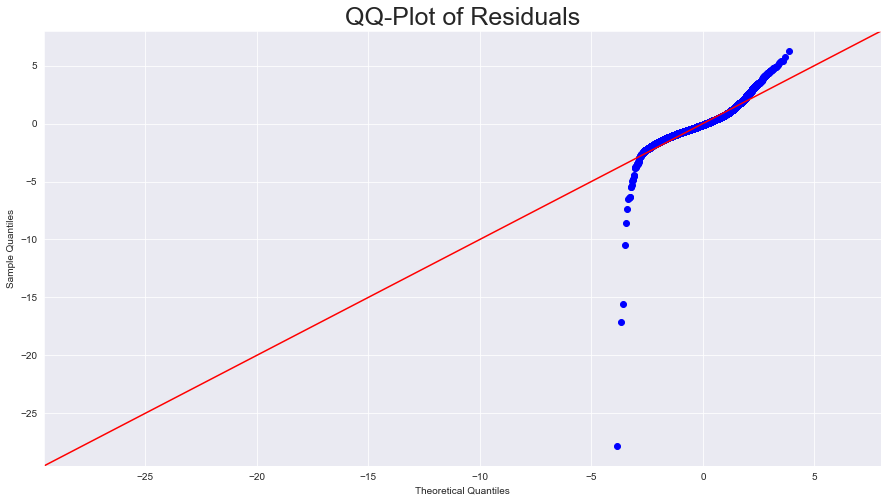

In [18]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model7)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

fig, ax = plt.subplots(figsize=(15,8))
residuals = model7.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
ax.set_title('QQ-Plot of Residuals', fontsize = 25);

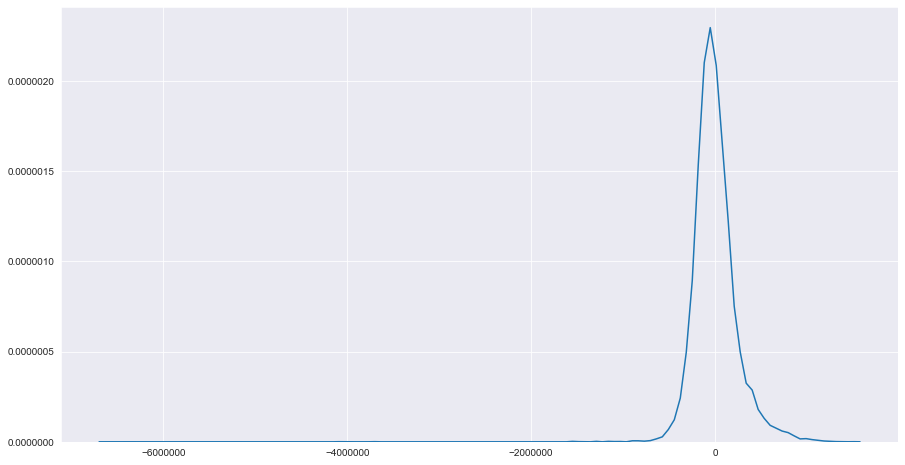

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
residuals = model7.resid
sns.kdeplot(residuals);

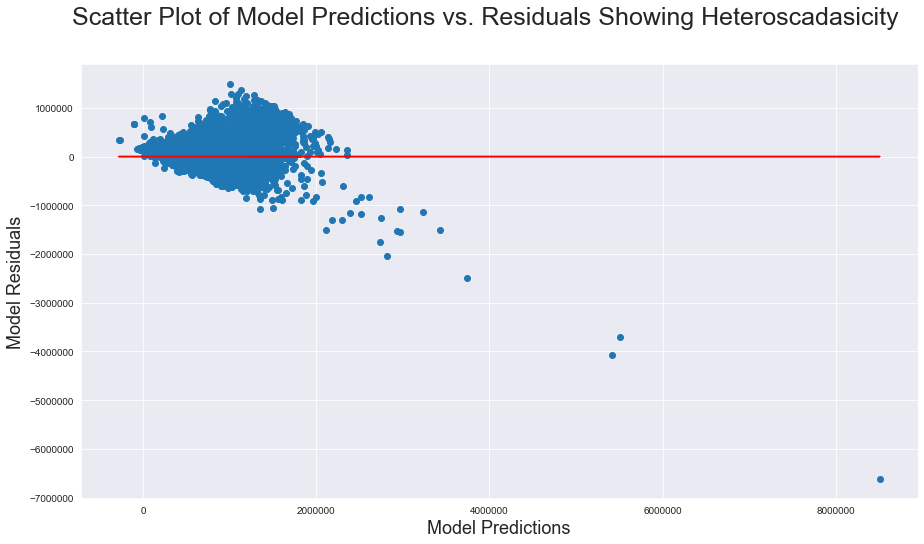

In [20]:
fig, ax = plt.subplots(figsize = (15,8))
plt.scatter(model7.predict(), model7.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
#ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(model7.predict(), [0 for i in range(len(df))], color = 'red');

## Model #9 ##
trying to use one hot encoder on baths

In [21]:
label_encoder = LabelEncoder()
model9_df = df[['saleprice', 'pricepersqft', 'sqftfinbasement', 'porch', 'sqftdeck', 'baths']].copy()


# Inspect value counts  of the baths column
model9_df["baths"]

0        4.50
1        3.25
2        1.75
3        1.50
4        1.75
         ... 
18288    3.00
18289    2.50
18290    2.25
18291    2.50
18292    3.25
Name: baths, Length: 17874, dtype: float64

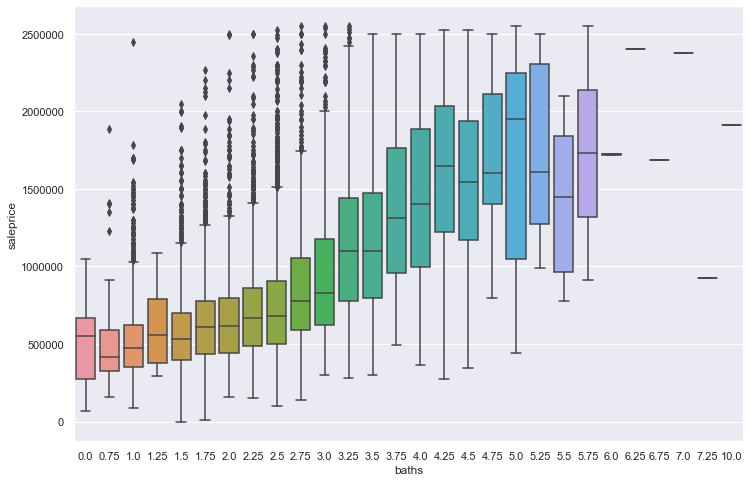

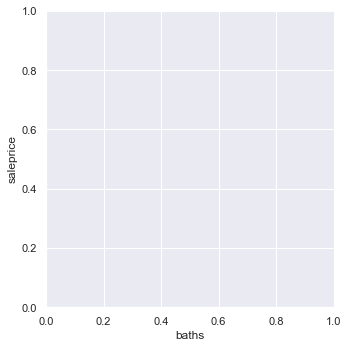

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
sns.catplot(x="baths", y="saleprice", data=model9_df, kind='box', ax=ax);

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
bath_labels = label_encoder.fit_transform(model9_df["baths"])
bath_labels

array([16, 11,  5, ...,  7,  8, 11])

In [32]:
label_encoder.classes_

array([ 0.  ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,
        5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.75,  7.  ,  7.25,
       10.  ])

In [25]:
model9_df["baths_encoded"] = bath_labels
model9_df.baths_encoded.value_counts()

8     4413
5     2606
2     2556
7     1721
6     1616
9     1239
4     1092
12     714
10     663
11     609
14     156
13     151
15      90
16      82
1       70
17      24
3       19
18      15
19      12
0       10
20       7
21       2
22       2
23       1
24       1
25       1
26       1
27       1
Name: baths_encoded, dtype: int64

In [26]:
model9_df.drop("baths", axis=1, inplace=True)

In [27]:
formula="saleprice~" + "+".join(model9_df.iloc[:,1:].columns)
model9 = ols(formula=formula, data=model9_df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     6053.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:08:26   Log-Likelihood:            -2.4660e+05
No. Observations:               17874   AIC:                         4.932e+05
Df Residuals:                   17868   BIC:                         4.933e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.143e+05   6522.907    -48.178      0.000   -3.27e+05   -3.01e+05
pricepersqft     1343.8459     10.750    125.004      0.000    1322.774    1364.918
sqftfinbasement   129.5672      4.368     29.660      0.000     121.005     138.130
porch             359.8603     12.468     28.862      0.000     335.421     384.300
sqftdeck          145.1971      8.949     16.224      0.000     127.655     162.739
baths_encoded    7.025e+04    640.507    109.683      0.000     6.9e+04    7.15e+04
==============================================================================
Omnibus:                     8130.996   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1552471.939
Skew:                          -1.074   Prob(JB):                         0.00
Kurtosis:                      48.606   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rainbow statistic: 0.9318927667402662
Rainbow p-value: 0.9995706946699393


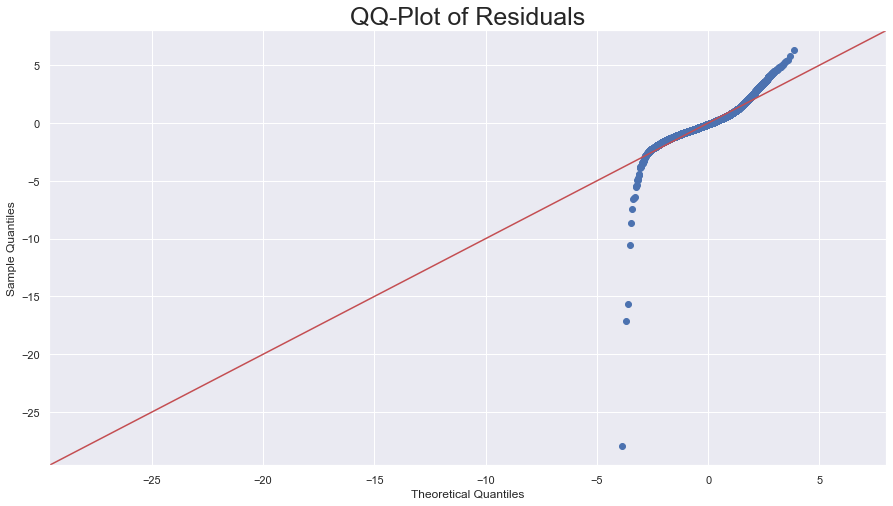

In [28]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model9)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

fig, ax = plt.subplots(figsize=(15,8))
residuals = model9.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
ax.set_title('QQ-Plot of Residuals', fontsize = 25);

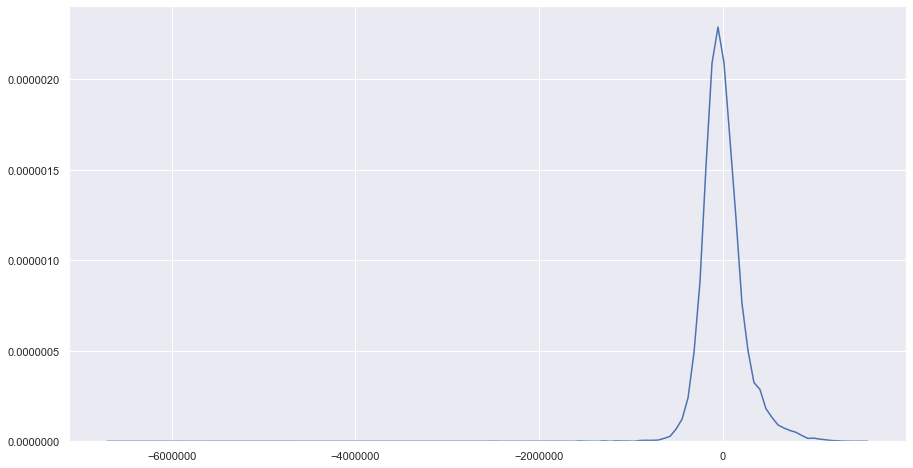

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
residuals = model9.resid
sns.kdeplot(residuals);

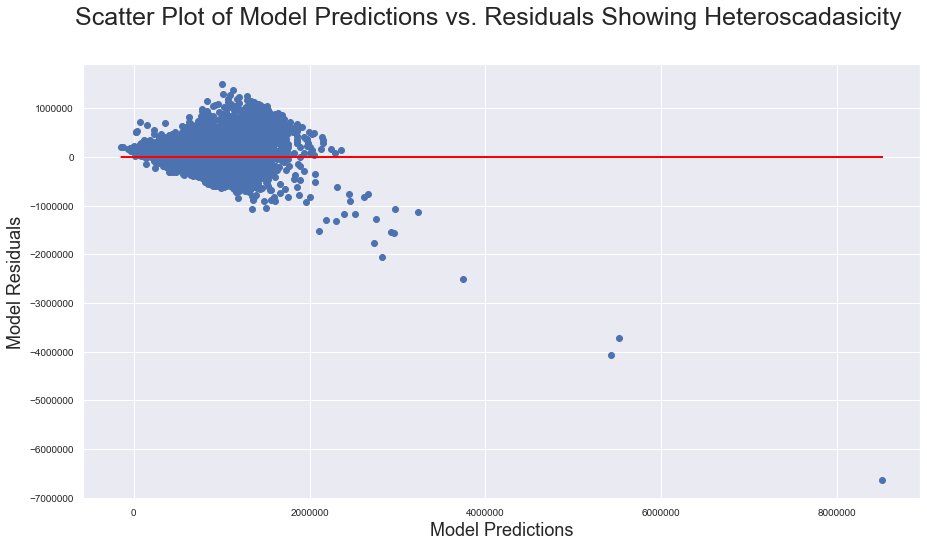

In [30]:
fig, ax = plt.subplots(figsize = (15,8))
plt.scatter(model9.predict(), model9.resid)
sns.set(font_scale = 1)
fig.suptitle('Scatter Plot of Model Predictions vs. Residuals Showing Heteroscadasicity', fontsize = 25)
#ax.set_title('Homoscadasicity Assumption Not Met', fontsize = 20)
plt.xlabel('Model Predictions', fontsize = 18)
plt.ylabel('Model Residuals', fontsize = 18)
ax.tick_params(labelsize=10)
plt.plot(model9.predict(), [0 for i in range(len(model9_df))], color = 'red');

In [ ]:
df['']